In [1]:
#Add Matplotlib inline magic command
%matplotlib inline

In [2]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts

In [3]:
#File to load
city_data_to_load= "Resources/city_data.csv"
ride_data_to_load= "Resources/ride_data.csv"

In [4]:
# Read files in Pandas and store it in pandas DataFrame

city_data_df = pd.read_csv(city_data_to_load)
print(city_data_df)
ride_data_df = pd.read_csv(ride_data_to_load)

                city  driver_count   type
0        Richardfort            38  Urban
1       Williamsstad            59  Urban
2        Port Angela            67  Urban
3         Rodneyfort            34  Urban
4        West Robert            39  Urban
..               ...           ...    ...
115     Bradshawfurt             7  Rural
116     New Ryantown             2  Rural
117   Randallchester             9  Rural
118      Jessicaport             1  Rural
119  South Saramouth             7  Rural

[120 rows x 3 columns]


In [5]:
#Get all the rows with null values-City_data_df
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [6]:
#Get all the rows with null values-Ride_data_df
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [7]:
#Alternate method for finding null values
city_data_df.isnull().sum()
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [8]:
#Getting type for driver_count
city_data_df['driver_count'].dtype

dtype('int64')

In [9]:
#Get the unique values of the type of city
city_data_df['type'].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [10]:
#Get the number of data points from the Urban cities
sum(city_data_df['type']=='Urban')

66

In [11]:
#Get the number of data points from the Suburban cities
sum(city_data_df['type']=='Suburban')

36

In [12]:
#Get the number of data points from the Rural cities
sum(city_data_df['type']=='Rural')

18

In [13]:
#Get the columns and the rows that are not null
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [14]:
ride_data_df['fare'].dtype

dtype('float64')

In [15]:
ride_data_df['ride_id'].dtype


dtype('int64')

In [16]:
#Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city","city"])

#Display the DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


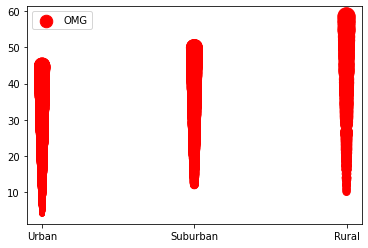

In [17]:
fig, ax = plt.subplots()
ax.scatter(pyber_data_df['type'], pyber_data_df['fare'], color = "red", s=[i*5 for i in pyber_data_df['fare']], label = "OMG")
#plt.gca().invert_yaxis()
#plt.xlabel("Fare($)")
#plt.ylabel("Date")
#plt.title("PyBer Fare by Month")
#plt.xlim(0,50)
plt.legend()

In [18]:
#Create the Urban city DataFrame
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
urban_cities_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
1620,Reynoldsfurt,2019-02-14 11:25:10,39.40,9070692324754,67,Urban
1621,Christopherfurt,2019-03-13 01:47:52,32.05,2788817929605,41,Urban
1622,Raymondhaven,2019-03-20 02:20:34,38.53,8658255136559,11,Urban
1623,Port Johnbury,2019-03-26 07:22:45,7.63,8089282605778,3,Urban


In [19]:
#Create the Suburban city DataFrame
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
suburban_cities_df

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2019-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,East Kentstad,2019-04-07 19:44:19,18.75,6575961095852,20,Suburban
1627,Lake Omar,2019-01-17 21:33:35,21.71,966911700371,22,Suburban
1628,Myersshire,2019-02-27 17:38:39,17.10,5706770909868,19,Suburban
1629,West Hannah,2019-04-19 01:06:59,37.78,2273047151891,12,Suburban
...,...,...,...,...,...,...
2245,West Hannah,2019-03-02 17:06:03,13.92,7388937249208,12,Suburban
2246,Lake Robertside,2019-04-03 03:27:45,12.76,1301757653884,4,Suburban
2247,Colemanland,2019-01-10 06:49:58,27.70,8704067171414,23,Suburban
2248,East Marymouth,2019-02-12 23:18:53,47.41,7409660239158,5,Suburban


In [20]:
#Create the Rural city DataFrame
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]
rural_cities_df

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [21]:
#Not a part of the code, just a side quest
#Find total number of rides for Urban cities
#urban_count = urban_cities_df["ride_id"].count()
#urban_mean = urban_cities_df["fare"].mean()
#print(urban_count, "+", urban_mean)

In [22]:
#Get the number of rides for the urban cities
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [23]:
#Get the number of rides for the suburban cities
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count.head()

city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: ride_id, dtype: int64

In [24]:
#Get the number of rides for the rural cities
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count.head()

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

In [25]:
#Get the average fare for rural city DataFrame
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare.head()

city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64

In [26]:
#Get the average fare for urban city DataFrame
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [27]:
#Get the average fare for suburban city DataFrame
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare.head()

city
Barronchester    36.422500
Bethanyland      32.956111
Brandonfort      35.437368
Colemanland      30.894545
Davidfurt        31.995882
Name: fare, dtype: float64

In [28]:
#Get the average number of drivers for each city type.
#for Urban cities
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
print(urban_driver_count)

#for Suburban cities
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]

#for Rural cities
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]


city
Amandaburgh            12.0
Barajasview            26.0
Carriemouth            52.0
Christopherfurt        41.0
Deanville              49.0
                       ... 
West Patrickchester    25.0
West Robert            39.0
West Samuelburgh       73.0
Williamsstad           59.0
Williamsview           46.0
Name: driver_count, Length: 66, dtype: float64


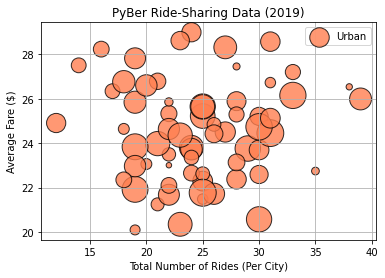

In [29]:
# Create a scatter plot for urban cities
plt.scatter(urban_ride_count, urban_avg_fare, color="coral", label="Urban", s=10*urban_driver_count,
           edgecolor="black", linewidths=1, alpha=0.8)
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.grid(True)
plt.legend()

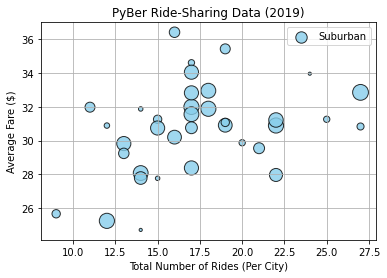

In [30]:
#create a scatter plot for the suburban cities
plt.scatter(suburban_ride_count, suburban_avg_fare, color="skyblue", 
           s=10*suburban_driver_count, label="Suburban", 
           edgecolor="black", linewidths=1, alpha=0.8)
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.grid(True)
plt.legend()

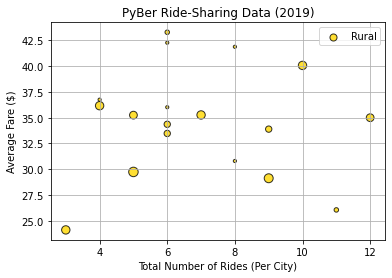

In [31]:
#Create a scatter plot for the Rural cities
plt.scatter(rural_ride_count, rural_avg_fare, color="gold", 
           s=10*rural_driver_count, label="Rural", 
           edgecolors="black", linewidths=1, alpha=0.8)
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.grid(True)
plt.legend()

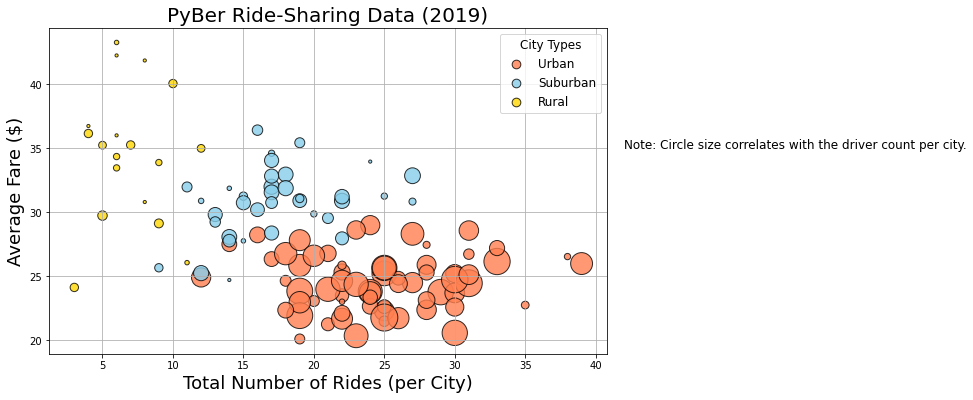

In [32]:
# Add the scatter charts for each type of cities
plt.subplots(figsize=(10,6))
plt.scatter(urban_ride_count, urban_avg_fare, color="coral", label="Urban", s=10*urban_driver_count,
           edgecolor="black", linewidths=1, alpha=0.8)
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.grid(True)
plt.legend()


plt.scatter(suburban_ride_count, suburban_avg_fare, color="skyblue", 
           s=10*suburban_driver_count, label="Suburban", 
           edgecolor="black", linewidths=1, alpha=0.8)
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.grid(True)
plt.legend()

plt.scatter(rural_ride_count, rural_avg_fare, color="gold", 
           s=10*rural_driver_count, label="Rural", 
           edgecolors="black", linewidths=1, alpha=0.8)
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.grid(True)
plt.legend()

#Incorporate the other graph properties
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=18)
plt.xlabel("Total Number of Rides (per City)", fontsize=18)
plt.grid(True)

#Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
                 scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

#Incorporate a text label about circle size
plt.text(42, 35, "Note: Circle size correlates with the driver count per city.", fontsize="12")

#Save the figure
plt.savefig("analysis/Fig1.png")

#show the plot
plt.show()

In [33]:
pyber_data_df.describe()

,fare,ride_id,driver_count
count,2375.000000,2.375000e+03,2375.000000
mean,26.753112,4.887270e+12,28.930105
std,12.109465,2.907361e+12,20.666306
min,4.050000,3.218337e+08,1.000000
25%,17.190000,2.381175e+12,11.000000
50%,26.600000,4.748541e+12,23.000000
75%,36.645000,7.461936e+12,45.000000
max,58.550000,9.991538e+12,73.000000


In [34]:
#Skill drill
print(suburban_cities_df.describe())
print(urban_cities_df.describe())


             fare       ride_id  driver_count
count  625.000000  6.250000e+02    625.000000
mean    30.970128  4.971015e+12     13.712000
std     10.677508  2.912410e+12      8.042372
min     12.050000  3.218337e+08      1.000000
25%     21.970000  2.364253e+12      5.000000
50%     30.750000  5.053221e+12     16.000000
75%     39.830000  7.551674e+12     21.000000
max     49.960000  9.917744e+12     25.000000
              fare       ride_id  driver_count
count  1625.000000  1.625000e+03   1625.000000
mean     24.525772  4.873485e+12     36.678154
std      11.738649  2.907440e+12     20.075545
min       4.050000  1.458810e+10      3.000000
25%      14.550000  2.400244e+12     22.000000
50%      24.640000  4.711188e+12     37.000000
75%      34.580000  7.451579e+12     52.000000
max      44.970000  9.991538e+12     73.000000


In [35]:
# Get summary statistics.
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [36]:
# GEt summart statistics for Suburban cities. round function will round the values to 2 significant digits
round(suburban_ride_count.describe(),2)

count    36.00
mean     17.36
std       4.32
min       9.00
25%      14.00
50%      17.00
75%      19.25
max      27.00
Name: ride_id, dtype: float64

In [37]:
#Get statistics for rural cities
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [38]:
# Calculate the mean of the ride count for each city type. 
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [39]:
#Use median function on urban ride count DF
round(urban_ride_count.median(),2)

24.0

In [40]:
#Use mode function on urban ride count DF
round(urban_ride_count.mode(),2)

0    22
1    25
dtype: int64

In [41]:
#Use mode function on suburban ride count DF
round(suburban_ride_count.mode(), 2)

0    17
dtype: int64

In [42]:
# Calculate the measure of central tendency for the ride count for the urban cities.
mean_urban_ride_count = np.mean(urban_ride_count)
print(f" The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the urban ride count trips is {median_urban_ride_count:.2f}.")

mode_urban_ride_count=sts.mode(urban_ride_count)
print(f"The mode for the urban ride count trips is {mode_urban_ride_count}")


 The mean for the ride counts for urban trips is 24.62.
The median for the urban ride count trips is 24.00.
The mode for the urban ride count trips is ModeResult(mode=array([22], dtype=int64), count=array([7]))


In [43]:
#Skill drill
#How many times does 17 appear in the suburban cities?
mode_suburban_ride_count=sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for the suburban trips is {mode_suburban_ride_count}")

The mode for the ride counts for the suburban trips is ModeResult(mode=array([17], dtype=int64), count=array([7]))


In [44]:
#Skill drill
#Calculate the mode for the rural cities using SciPy
mode_rural_ride_count=sts.mode(rural_ride_count)
print(mode_rural_ride_count)

ModeResult(mode=array([6], dtype=int64), count=array([5]))


In [45]:
#Get the fare for the urban cities.
urban_fares=urban_cities_df["fare"]
urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [46]:
#Calculate the measure of central tendency for the average fare for the urban cities. 
mean_urban_fares=np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")
median_urban_fares=np.median(urban_fares)
print(f"The median fare price for the urban trips is ${median_urban_fares:.2f}.")
mode_urban_fares= sts.mode(urban_fares)
print(f"The mode for fare price for the urban trips is {mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for the urban trips is $24.64.
The mode for fare price for the urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [47]:
suburban_fares=suburban_cities_df["fare"]
mean_suburban_fares=np.mean(suburban_fares)
print(mean_suburban_fares)

rural_fares=rural_cities_df["fare"]
mean_rural_fares=np.mean(rural_cities_df["fare"])
#mean_rural_fares=np.mean(rural_fares)
print(mean_rural_fares)

30.97012800000002
34.623440000000016


In [48]:
#Get the driver count from the cities
urban_drivers=urban_cities_df["driver_count"]
urban_drivers.head()

0     5
1    72
2    57
3    34
4    46
Name: driver_count, dtype: int64

In [49]:
#Skill Drill: Calculate the mean,median and mode for Urban drivers using numPy and SciPy
mean_urban_drivers=np.mean(urban_drivers)
median_urban_drivers=np.median(urban_drivers)
mode_urban_drivers=sts.mode(urban_drivers)
print(f" The mean, median and mode for the drivers in urban cities are {mean_urban_drivers:.2f} ,  {median_urban_drivers:.2f} , {mode_urban_drivers}.")

 The mean, median and mode for the drivers in urban cities are 36.68 ,  37.00 , ModeResult(mode=array([39], dtype=int64), count=array([86])).


In [50]:
#Skill drill: Calculate the mean, median, mode for the suburban drivers using numpy and scipy.

#Create a series for Suburban driver count from suburban cities.
suburban_drivers=suburban_cities_df["driver_count"]
suburban_drivers.head()

#Calculate measure of central tendencies 
mean_suburban_drivers=np.mean(suburban_drivers)
median_suburban_drivers=np.median(suburban_drivers)
mode_suburban_drivers=sts.mode(suburban_drivers)
print(f" The mean, median and mode for the drivers in urban cities are {mean_suburban_drivers:.2f}, {median_suburban_drivers:.2f}, and {mode_suburban_drivers}.")

 The mean, median and mode for the drivers in urban cities are 13.71, 16.00, and ModeResult(mode=array([20], dtype=int64), count=array([79])).


In [51]:
#Skill Drill: Calculate the mean, median and mode for rural cities using NumPy and SciPy.

#Create a series for rural driver count from the rural cities DF.
rural_drivers=rural_cities_df["driver_count"]
rural_drivers.head()

#Calculate the measures of central tendencies for rural drivers
mean_rural_drivers=np.mean(rural_drivers)
median_rural_drivers=np.median(rural_drivers)
mode_rural_drivers=sts.mode(rural_drivers)

print(f"The mean number of rural drivers is {mean_rural_drivers:.2f}.")
print(f"The median number of rural drivers is {median_rural_drivers:.2f}.")
print(f'The mode for rural drivers is {mode_rural_drivers}')

The mean number of rural drivers is 4.30.
The median number of rural drivers is 4.00.
The mode for rural drivers is ModeResult(mode=array([1], dtype=int64), count=array([32]))


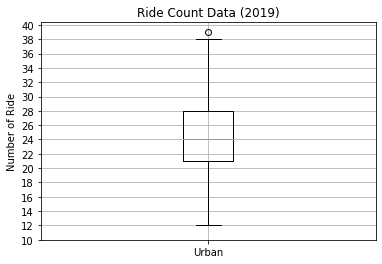

In [52]:
#Create a box and whiskers plot for the urban cities ride count 
x_labels = ["Urban"]

fig,ax=plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)

#Add the title, y-axis label and grid
ax.set_title("Ride Count Data (2019)")
ax.set_ylabel("Number of Ride")
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

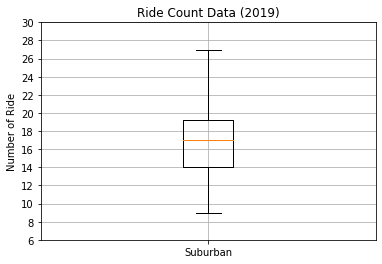

In [53]:
#Skill Drill
#Calculate summary statistics with box-and-whisker plots:Suburban ride

#Create a box-and-whisker plot for the suburban cities ride count
x_label = ["Suburban"]
fig, ax=plt.subplots()
ax.boxplot(suburban_ride_count, labels=x_label)

#Add titles, y-axis label and grids.
ax.set_title("Ride Count Data (2019)")
ax.set_ylabel("Number of Ride")
ax.set_yticks(np.arange(6, 32, step=2.0))
ax.grid()
plt.show()

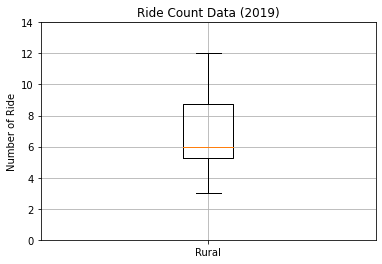

In [54]:
#Skill Drill
#Calculate the summary statistics with box-and-whisker plots:Rural ride.

#Create a box-and-whisker plot for the suburban cities ride count
x_label=["Rural"]
fig, ax=plt.subplots()
ax.boxplot(rural_ride_count, labels=x_label)

#Add titles, y-axis label and grids.
ax.set_title("Ride Count Data (2019)")
ax.set_ylabel("Number of Ride")
ax.set_yticks(np.arange(0,16, step=2.0))
ax.grid()
plt.show()


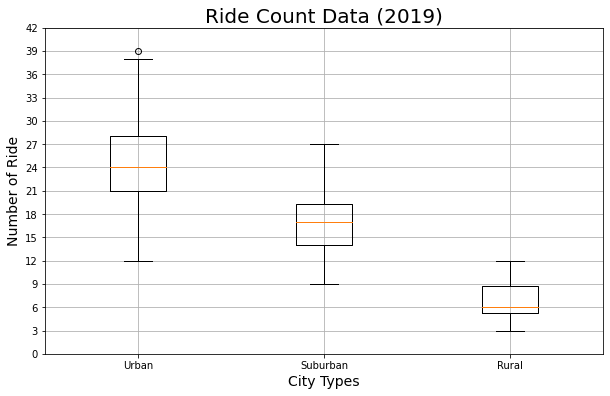

In [55]:
# Add all ride count box-and whisker plots to the same graph.
x_labels= ["Urban", "Suburban", "Rural"]

ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]

fig, ax=plt.subplots(figsize=(10,6))
ax.set_title("Ride Count Data (2019)", fontsize=20)
ax.set_ylabel("Number of Ride", fontsize=14)
ax.set_xlabel("City Types", fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0,45, step=3.0))
ax.grid()

#Saves the figure
plt.savefig("analysis/Fig2.png")

#plots the graph
plt.show()

In [56]:
#Get the city that matches 39.
urban_city_outlier =urban_ride_count[urban_ride_count ==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


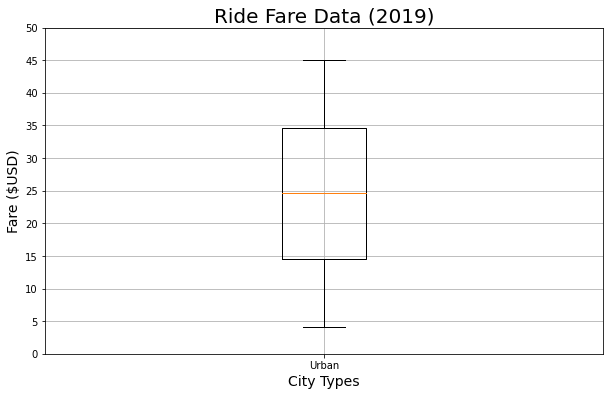

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [57]:
#Create a box-and-whisker plot for the urban fare data.
x_labels=["Urban"]
fig,ax=plt.subplots(figsize=(10,6))
ax.boxplot(urban_fares, labels=x_labels)

#Add title, y-axis label and grids
ax.set_title("Ride Fare Data (2019)", fontsize=20)
ax.set_ylabel("Fare ($USD)", fontsize=14)
ax.set_yticks(np.arange(0,51, step=5.0))
ax.set_xlabel("City Types", fontsize=14)
ax.grid()
plt.show()
print("Summary Statistics")
urban_fares.describe()


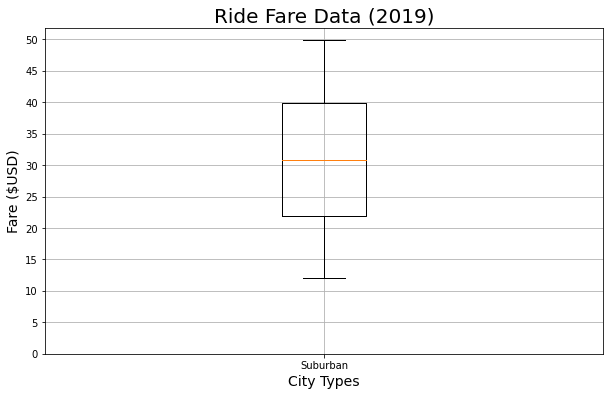

Summary Statistics


count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64

In [58]:
#Skill Drill: Create a box-and-whisker plot for suburban fare data

x_labels=["Suburban"]
fig,ax=plt.subplots(figsize=(10,6))
ax.boxplot(suburban_fares, labels=x_labels)

#Add title, Y-axis labels, x-axis label, grid
ax.set_title("Ride Fare Data (2019)", fontsize=20)
ax.set_ylabel("Fare ($USD)", fontsize=14)
ax.set_xlabel("City Types", fontsize=14)
ax.set_yticks(np.arange(0,51, step=5.0))
ax.grid()
plt.show()

print("Summary Statistics")
suburban_fares.describe()

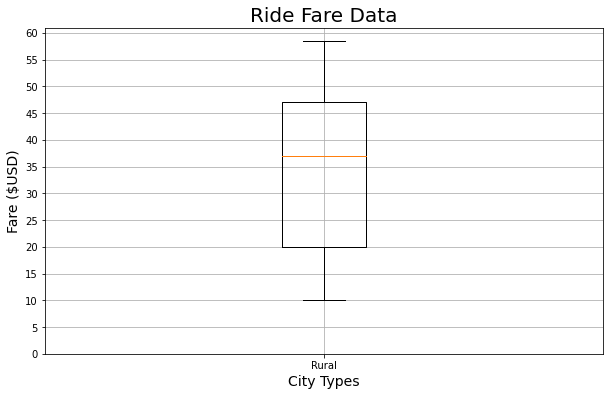

Summary Statistics


count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64

In [59]:
#Skill Drill: Create a box-and whisker plot for rural city fare data.
x_labels=["Rural"]
fig,ax=plt.subplots(figsize=(10,6))
ax.boxplot(rural_fares, labels=x_labels)

#Add titles, y-axis labels, x-axis labels, grids, y-ticks
ax.set_title("Ride Fare Data", fontsize=20)
ax.set_ylabel("Fare ($USD)", fontsize=14)
ax.set_xlabel("City Types", fontsize=14)
ax.set_yticks(np.arange(0,65, step=5.0))
ax.grid()
plt.show()

print("Summary Statistics")
rural_fares.describe()

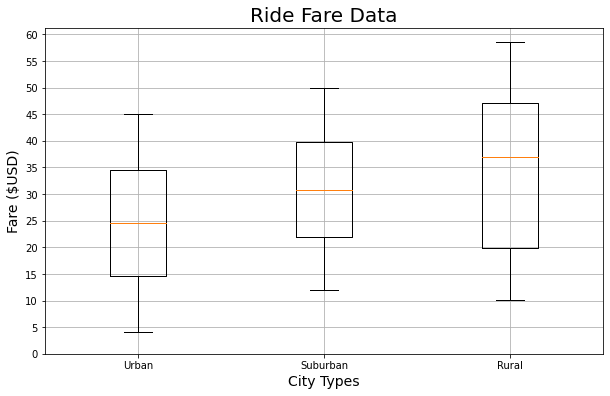

<Figure size 432x288 with 0 Axes>

In [60]:
# Add all ride count box-and whisker plots to the same graph.
x_labels=["Urban", "Suburban", "Rural"]
fare_count_data =[urban_fares, suburban_fares, rural_fares]
fig,ax=plt.subplots(figsize=(10,6))
ax.boxplot(fare_count_data, labels=x_labels)

#Add titles, y-axis labels, x-axis labels, grids, y-ticks
ax.set_title("Ride Fare Data", fontsize=20)
ax.set_ylabel("Fare ($USD)", fontsize=14)
ax.set_xlabel("City Types", fontsize=14)
ax.set_yticks(np.arange(0,65, step=5.0))
ax.grid()
plt.show()

#Saves the figure
plt.savefig("analysis/Fig3.png")

#plots the graph
plt.show()

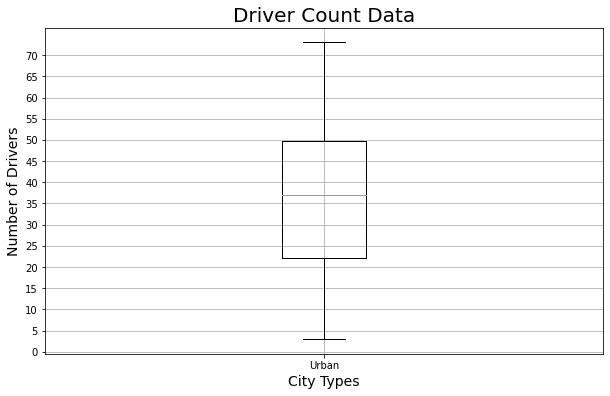

Summary Statistics


count    66.000000
mean     36.439394
std      19.827819
min       3.000000
25%      22.000000
50%      37.000000
75%      49.750000
max      73.000000
Name: driver_count, dtype: float64

In [61]:
# Create a box-and whisker plot for urban driver count data.
x_labels=["Urban"]
fig,ax=plt.subplots(figsize=(10,6))
ax.boxplot(urban_driver_count, labels=x_labels)

#Add titles, y-axis labels, x-axis labels, grids, y-ticks
ax.set_title("Driver Count Data", fontsize=20)
ax.set_ylabel("Number of Drivers", fontsize=14)
ax.set_xlabel("City Types", fontsize=14)
ax.set_yticks(np.arange(0,75, step=5.0))
ax.grid()
plt.show()

print("Summary Statistics")
urban_driver_count.describe()

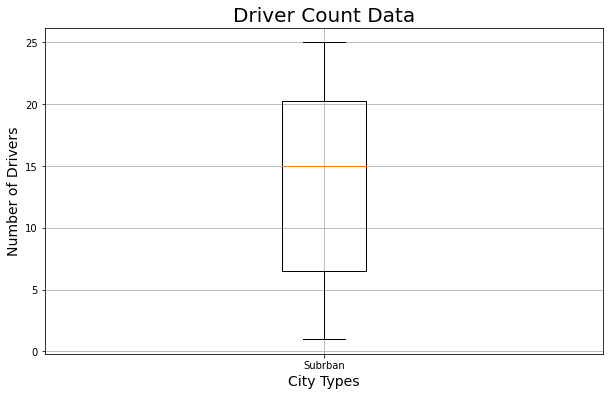

Summary Statistics


count    36.000000
mean     13.611111
std       8.022389
min       1.000000
25%       6.500000
50%      15.000000
75%      20.250000
max      25.000000
Name: driver_count, dtype: float64

In [62]:
#Skill Drill: Create a box-and whisker plot for Suburban driver count data.
x_labels=["Subrban"]
fig,ax=plt.subplots(figsize=(10,6))
ax.boxplot(suburban_driver_count, labels=x_labels)

#Add titles, y-axis labels, x-axis labels, grids, y-ticks
ax.set_title("Driver Count Data", fontsize=20)
ax.set_ylabel("Number of Drivers", fontsize=14)
ax.set_xlabel("City Types", fontsize=14)
ax.set_yticks(np.arange(0,30, step=5.0))
ax.grid()
plt.show()

print("Summary Statistics")
suburban_driver_count.describe()

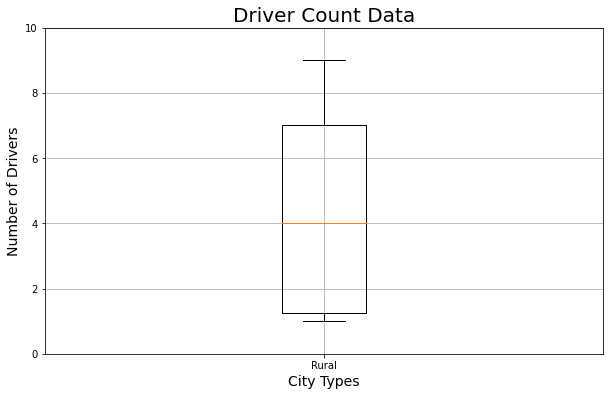

Summary Statistics


count    18.000000
mean      4.333333
std       2.828427
min       1.000000
25%       1.250000
50%       4.000000
75%       7.000000
max       9.000000
Name: driver_count, dtype: float64

In [63]:
#Skill Drill: Create a box-and whisker plot for Rural driver count data.
x_labels=["Rural"]
fig,ax=plt.subplots(figsize=(10,6))
ax.boxplot(rural_driver_count, labels=x_labels)

#Add titles, y-axis labels, x-axis labels, grids, y-ticks
ax.set_title("Driver Count Data", fontsize=20)
ax.set_ylabel("Number of Drivers", fontsize=14)
ax.set_xlabel("City Types", fontsize=14)
ax.set_yticks(np.arange(0,12, step=2.0))
ax.grid()
plt.show()

print("Summary Statistics")
rural_driver_count.describe()

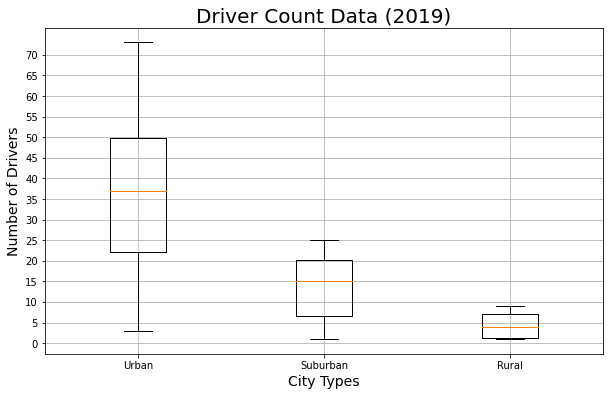

<Figure size 432x288 with 0 Axes>

In [64]:
# Add all driver count box-and whisker plots to the same graph.
x_labels=["Urban", "Suburban", "Rural"]
fare_count_data =[urban_driver_count, suburban_driver_count, rural_driver_count]
fig,ax=plt.subplots(figsize=(10,6))
ax.boxplot(fare_count_data, labels=x_labels)

#Add titles, y-axis labels, x-axis labels, grids, y-ticks
ax.set_title("Driver Count Data (2019)", fontsize=20)
ax.set_ylabel("Number of Drivers", fontsize=14)
ax.set_xlabel("City Types", fontsize=14)
ax.set_yticks(np.arange(0,75, step=5.0))
ax.grid()
plt.show()

#Saves the figure
plt.savefig("analysis/Fig4.png")

#plots the graph
plt.show()

In [65]:
#get the sum of fares for each city type
sum_fares_by_type=pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [72]:
#Get the sum of all the fares
total_fares=pyber_data_df["fare"].sum()
total_fares

63538.64

In [73]:
#Calculate the percentage of fare for each city type.
type_percents=sum_fares_by_type/total_fares*100
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

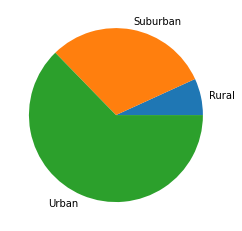

In [74]:
#build the percentage of fares by city type pie chart.
plt.pie(type_percents, labels=["Rural", "Suburban", "Urban"])
plt.show()

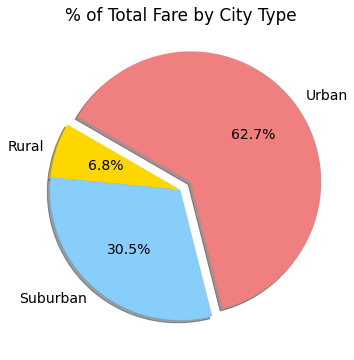

In [81]:
# Import mp1 to change the plot configuration using rcParams.
import matplotlib as mp1

# Build the percentage of fares by city type pie chart.
plt.subplots(figsize=(10, 6))

plt.pie(type_percents,
       labels=["Rural", "Suburban", "Urban"],
       colors=["gold", "lightskyblue", "lightcoral"],
       explode=[0, 0, 0.1],
       autopct='%1.1f%%',
       shadow=True, startangle=150)
plt.title("% of Total Fare by City Type")

#Change the default font size from 10 to 14.
mp1.rcParams["font.size"] = 14

#Save Figure
plt.savefig("Resources/Fig5.png")

#Show figure
plt.show()

In [87]:
#Calculate the percentage of ride for each city type.
ride_percents = 100 * pyber_data_df.groupby(["type"]).count()["ride_id"]/pyber_data_df["ride_id"].count()
ride_percents

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

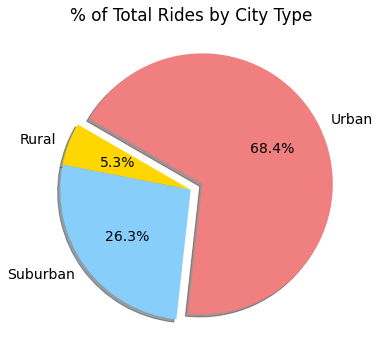

In [88]:
# Build the percentage of rides by city type pie chart.
plt.subplots(figsize=(10, 6))

plt.pie(ride_percents,
       labels=["Rural", "Suburban", "Urban"],
       colors=["gold", "lightskyblue", "lightcoral"],
       explode=[0, 0, 0.1],
       autopct='%1.1f%%',
       shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")

#Change the default font size from 10 to 14.
mp1.rcParams["font.size"] = 14

#Save Figure
plt.savefig("Resources/Fig6.png")

#Show figure
plt.show()

In [91]:
#Calculate the percentage of ride for each city type.
driver_percents = 100 * pyber_data_df.groupby(["type"]).sum()["driver_count"]/pyber_data_df["driver_count"].sum()
driver_percents

type
Rural        0.781557
Suburban    12.472893
Urban       86.745550
Name: driver_count, dtype: float64

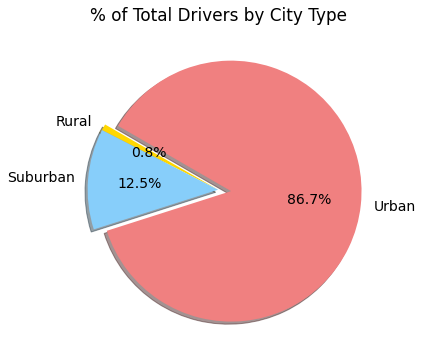

In [92]:
# Build the percentage of rides by city type pie chart.
plt.subplots(figsize=(10, 6))

plt.pie(driver_percents,
       labels=["Rural", "Suburban", "Urban"],
       colors=["gold", "lightskyblue", "lightcoral"],
       explode=[0, 0, 0.1],
       autopct='%1.1f%%',
       shadow=True, startangle=150)
plt.title("% of Total Drivers by City Type")

#Change the default font size from 10 to 14.
mp1.rcParams["font.size"] = 14

#Save Figure
plt.savefig("Resources/Fig7.png")

#Show figure
plt.show()